  We load library to use for this project

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Now, we read our data set obtained by [Kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales). It is a historical record of sales data in 3 different supermarkets for 3 months, then we visualize the first 5 observations to see all the variables in it.

In [2]:
supermarket <- read.csv('supermarket.csv')
head(supermarket, 5)

,Invoice.ID,Branch,City,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax.5.,Total,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
3,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
4,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
5,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Attribute information
  - **Invoice id**: Computer generated sales slip invoice identification number
  - **Branch**: Branch of supercenter (3 branches are available identified by A, B and C).
  - **City**: Location of supercenters
  - **Customer type**: Type of customers, recorded by Members for customers using member card and Normal for without member card.
  - **Gender**: Gender type of customer
  - **Product line**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
  - **Unit price**: Price of each product in $
  - **Quantity**: Number of products purchased by customer
  - **Tax**: 5% tax fee for customer buying
  - **Total**: Total price including tax
  - **Date**: Date of purchase (Record available from January 2019 to March 2019)
  - **Time**: Purchase time (10am to 9pm)
  - **Payment**: Payment used by customer for purchase (3 methods are available  Cash, Credit card and Ewallet)
  - **COGS**: Cost of goods sold
  - **Gross margin percentage**: Gross margin percentage
  - **Gross income**: Gross income
  - **Rating**: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

We see below the name of the variables their data types, then use the following line of code to be more specific about the data types of each column.



In [3]:
str(supermarket)

'data.frame':	1000 obs. of  17 variables:
 $ Invoice.ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ City                   : chr  "Yangon" "Naypyitaw" "Yangon" "Yangon" ...
 $ Customer.type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product.line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax.5.                 : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet

  There are many columns with `char` data type, we may get an error when trying to plot some data. We convert the data types to those that work best and select a few columns to continue our analysis.

In [4]:
# Replace the data by removing a couple of columns
supermarket <- supermarket |> select(-c(Invoice.ID, Branch, Gender,gross.margin.percentage))

# Change the data type of diferent columns
supermarket['Customer.type'] = as.factor(supermarket$Customer.type)
supermarket['City'] = as.factor(supermarket$City)
supermarket['Product.line'] = as.factor(supermarket$Product.line)
supermarket['Payment'] = as.factor(supermarket$Payment)
supermarket['Date'] = as.Date(supermarket$Date, '%m/%d/%y')

In [5]:
str(supermarket)

'data.frame':	1000 obs. of  13 variables:
 $ City         : Factor w/ 3 levels "Mandalay","Naypyitaw",..: 3 2 3 3 3 2 3 2 3 1 ...
 $ Customer.type: Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Product.line : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax.5.       : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...
 $ Date         : Date, format: "2020-01-05" "2020-03-08" ...
 $ Time         : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment      : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...


In [6]:
head(supermarket, 5)

,City,Customer.type,Product.line,Unit.price,Quantity,Tax.5.,Total,Date,Time,Payment,cogs,gross.income,Rating
,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<date>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715,2020-01-05,13:08,Ewallet,522.83,26.1415,9.1
2,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200,2020-03-08,10:29,Cash,76.40,3.8200,9.6
3,Yangon,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,2020-03-03,13:23,Credit card,324.31,16.2155,7.4
4,Yangon,Member,Health and beauty,58.22,8,23.2880,489.0480,2020-01-27,20:33,Ewallet,465.76,23.2880,8.4
5,Yangon,Normal,Sports and travel,86.31,7,30.2085,634.3785,2020-02-08,10:37,Ewallet,604.17,30.2085,5.3


Before to analyze data we need to remove duplicate rows and null values if they exist.  

In [7]:
# Sum of the duplicate values whether it contains or not
sum(duplicated(supermarket))

[1] 0

In [8]:
# Sum of the null values whether it contains or not
sum(is.na(supermarket))

[1] 0

We are ready to analyze data because we did not find duplicate and null values.

We will focus on the sales made by *Customer type* and will do visualizations.

In [9]:
# We change the plot size for our visualizations
options(repr.plot.width=10, repr.plot.height=10)

### What are the total sales and product line counts by customer type?

In [10]:
supermarket |>
  group_by(Customer.type, Product.line) |>
  summarise(count = n(), Total = sum(Total), .groups = 'drop_last') |>
  arrange(Customer.type, -Total)

Customer.type,Product.line,count,Total
<fct>,<fct>,<int>,<dbl>
Member,Food and beverages,94,31357.62
Member,Sports and travel,87,28234.30
Member,Home and lifestyle,83,27978.03
Member,Fashion accessories,86,26323.96
Member,Health and beauty,73,25831.04
Member,Electronic accessories,78,24498.49
Normal,Electronic accessories,92,29839.04
Normal,Fashion accessories,92,27981.93
Normal,Sports and travel,79,26888.53


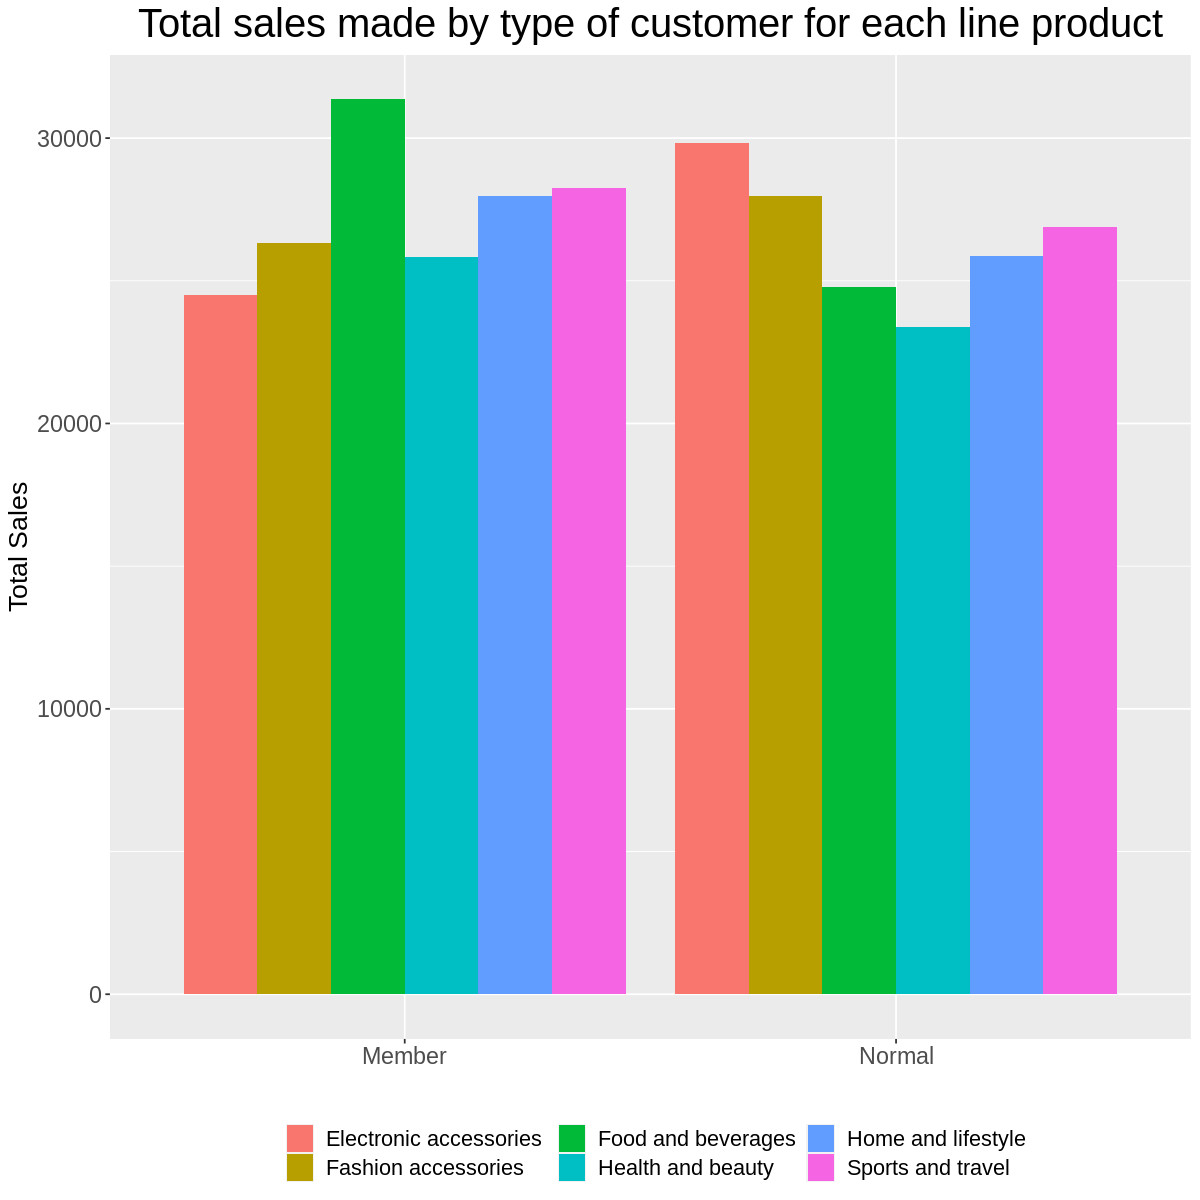

In [11]:
supermarket |>
  group_by(Customer.type, Product.line) |>
  summarise(count = n(), Total = sum(Total), .groups = 'drop_last') |>
  ggplot(aes(Customer.type, Total, fill = Product.line)) +
  geom_bar(position = 'dodge', stat = 'identity') + 
  xlab('') + ylab('Total Sales') +
  theme(plot.title = element_text(hjust = 0.5),
        title = element_text(size=20),
        axis.title = element_text(size=16),
        axis.text = element_text(size=14),
        legend.position = 'bottom',
        legend.title = element_text(size=14),
        legend.text = element_text(size=13)) +
  scale_fill_discrete(name = NULL) +
  ggtitle('Total sales made by type of customer for each line product')

### What are the total sales and counts made by customer type for each City?

In [12]:
supermarket |> 
  group_by(City, Customer.type) |>
  summarize(count = n(), Total = sum(Total), .groups = 'drop_last')

City,Customer.type,count,Total
<fct>,<fct>,<int>,<dbl>
Mandalay,Member,165,53704.69
Mandalay,Normal,167,52492.99
Naypyitaw,Member,169,56881.28
Naypyitaw,Normal,159,53687.42
Yangon,Member,167,53637.48
Yangon,Normal,173,52562.89


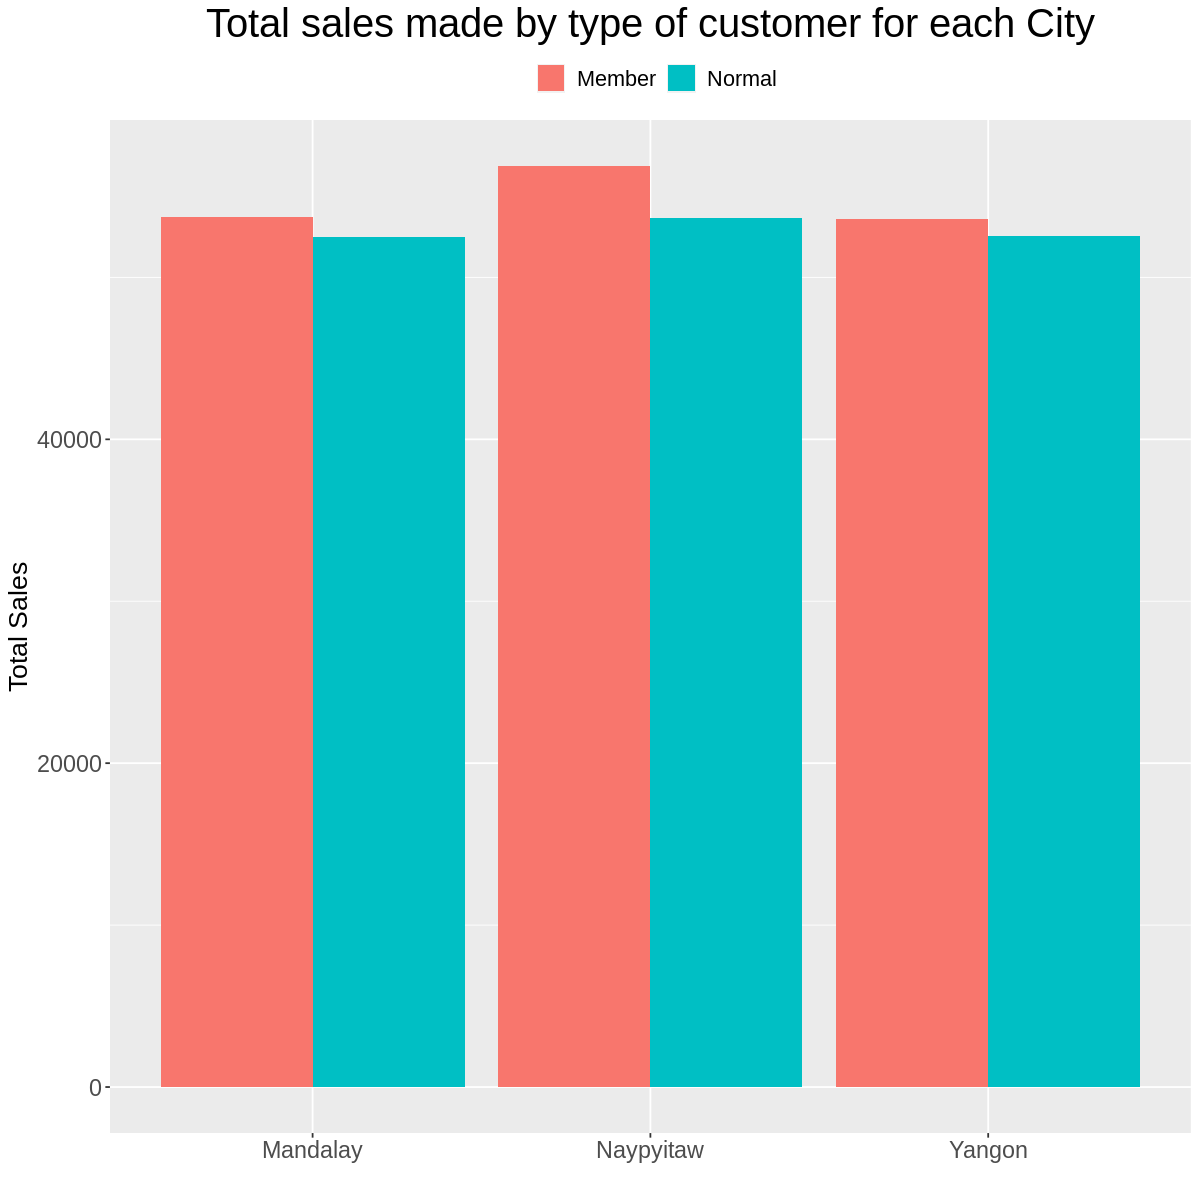

In [13]:
supermarket |> 
  group_by(City, Customer.type) |>
  summarize(count = n(), Total = sum(Total), .groups = 'drop_last') |>
  ggplot(aes(City, Total, fill = Customer.type)) +
  geom_bar(position = 'dodge', stat = 'identity') +
  xlab('') + ylab('Total Sales') + 
  theme(plot.title = element_text(hjust = 0.5),
        title = element_text(size=20),
        axis.title = element_text(size=16),
        axis.text = element_text(size=14),
        legend.position = 'top',
        legend.title = element_text(size=14),
        legend.text = element_text(size=13)) +
  scale_fill_discrete(name = NULL) +
  ggtitle('Total sales made by type of customer for each City')

### What are the total sales made for each month?

In [14]:
supermarket |>
  group_by(month = lubridate::floor_date(Date, 'month'), Customer.type) |>
  summarise(Total = sum(Total), .groups = 'drop_last') 

month,Customer.type,Total
<date>,<fct>,<dbl>
2020-01-01,Member,57914.83
2020-01-01,Normal,58377.04
2020-02-01,Member,50296.05
2020-02-01,Normal,46923.32
2020-03-01,Member,56012.57
2020-03-01,Normal,53442.94


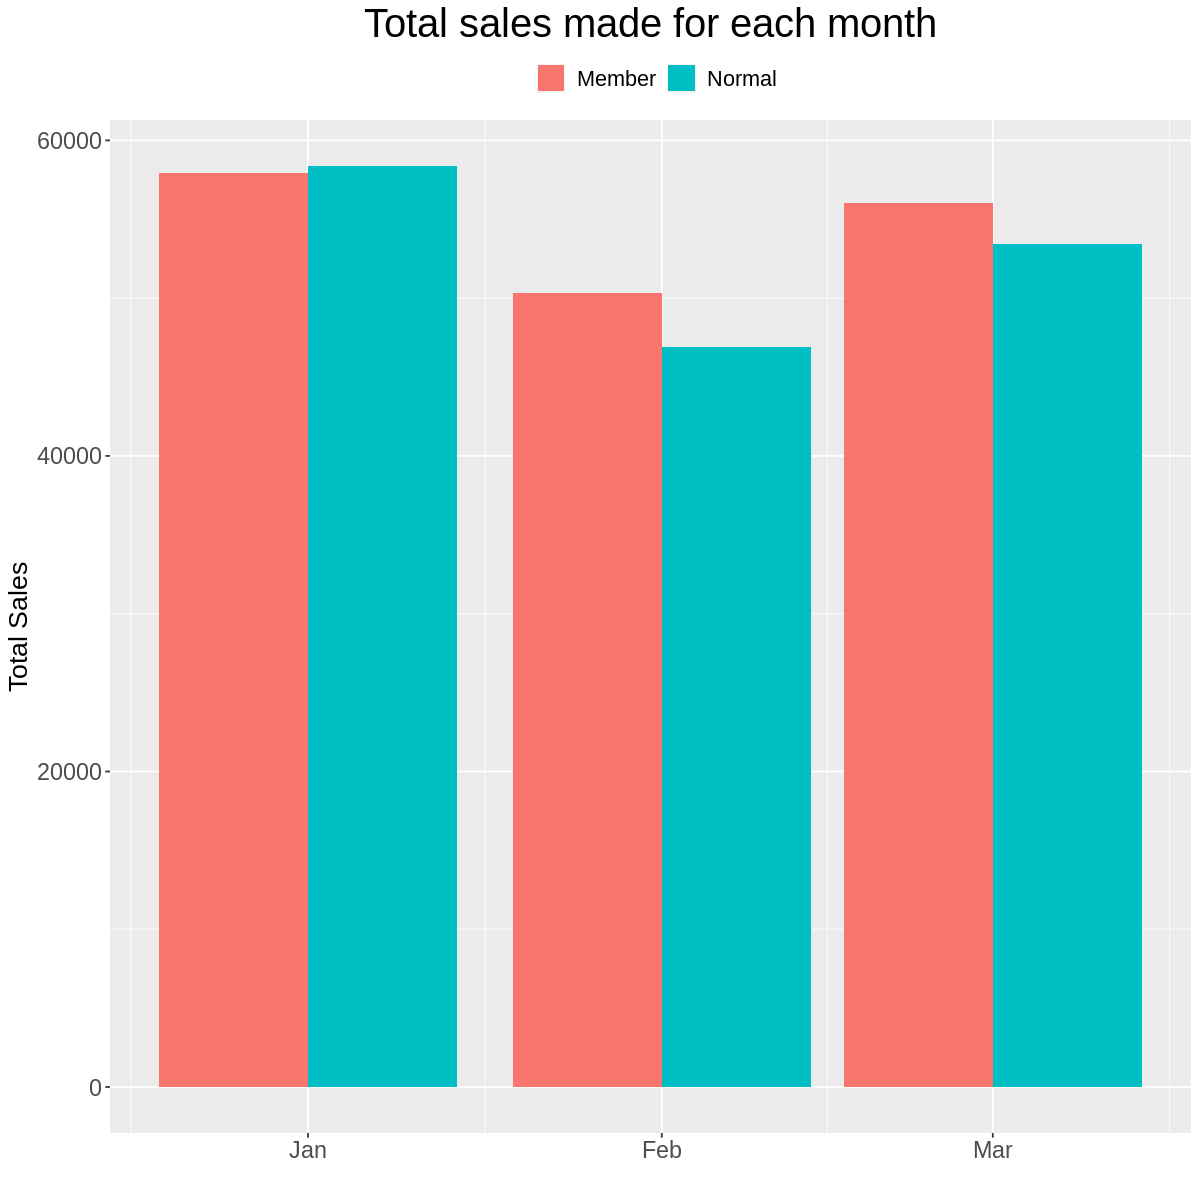

In [15]:
supermarket |> 
  group_by(month = lubridate::floor_date(Date, 'month'), Customer.type) |>
    summarize(sum_of_sales = sum(Total), .groups = 'drop_last') |>
    ggplot(aes(month, sum_of_sales, fill = Customer.type)) +
    geom_bar(position='dodge', stat='identity') +
    xlab('') + ylab('Total Sales') + 
    theme(plot.title = element_text(hjust = 0.5),
        title = element_text(size=20),
        axis.title = element_text(size=16),
        axis.text = element_text(size=14),
        legend.position = 'top',
        legend.title = element_text(size=14),
        legend.text = element_text(size=13)) +
    scale_fill_discrete(name = NULL) +
    ggtitle('Total sales made for each month')

### What are the different means of payment most used by type of client?

In [16]:
supermarket |>
  group_by(Customer.type, Payment) |>
  summarise(count = n(), Total = sum(Total), .groups = 'drop_last')

Customer.type,Payment,count,Total
<fct>,<fct>,<int>,<dbl>
Member,Cash,168,54661.02
Member,Credit card,172,57771.47
Member,Ewallet,161,51790.96
Normal,Cash,176,57545.55
Normal,Credit card,139,42995.60
Normal,Ewallet,184,58202.15


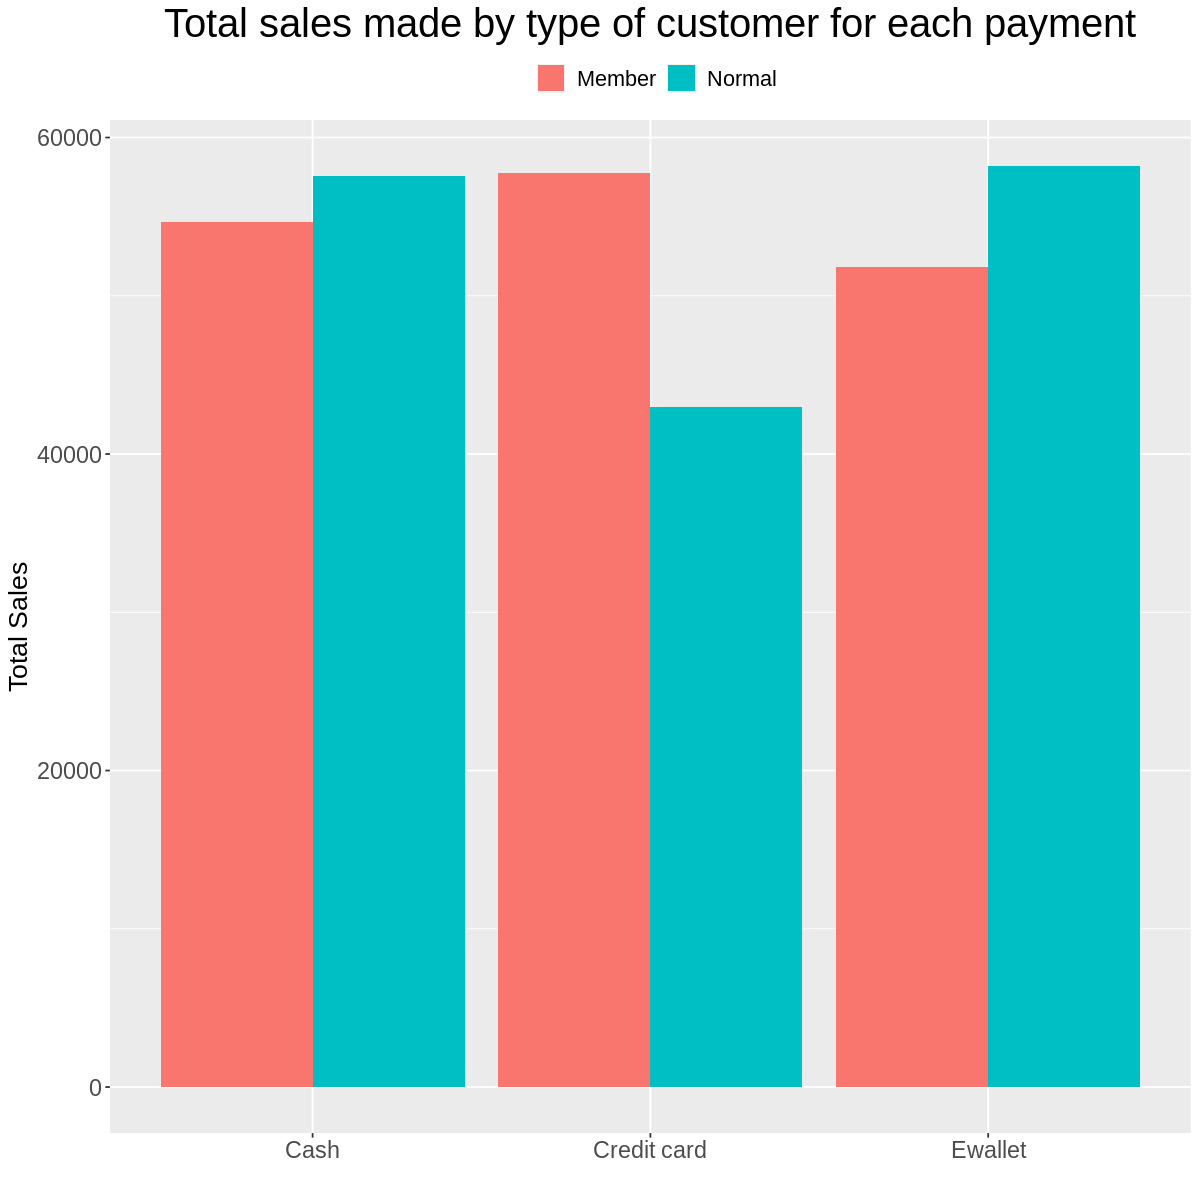

In [17]:
supermarket |>
  group_by(Customer.type, Payment) |>
  summarise(count = n(), Total = sum(Total), .groups = 'drop_last') |>
  ggplot(aes(Payment, Total, fill = Customer.type)) +
  geom_bar(position = 'dodge', stat = 'identity') +
  xlab('') + ylab('Total Sales') +
  theme(plot.title = element_text(hjust = 0.5),
        title = element_text(size=20),
        axis.title = element_text(size=16),
        axis.text = element_text(size=14),
        legend.position = 'top',
        legend.title = element_text(size=14),
        legend.text = element_text(size=13)) +
  scale_fill_discrete(name = NULL) +
  ggtitle('Total sales made by type of customer for each payment')
